In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pylab

In [2]:
pylab.rcParams['figure.figsize'] = 10,8
%matplotlib inline

In [3]:
df = pd.read_csv('./data/data_cleaned/edu_finance_fill_na.csv')

In [5]:
df.columns  = df.columns.str.lower()

In [6]:
df.head()

,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,other_expenditure,capital_outlay_expenditure,total_known_expenditure,unknown_expenditure,rev_per_enroll
0,Alabama,1992,7.203800e+05,2678885,304177,1659028,715680,2653798,1481703,735036,1.453021e+05,174053,2.536094e+06,117703.947601,3.718711
1,Alaska,1992,1.176000e+05,1049591,106780,720711,222100,972488,498362,350902,3.686479e+04,37451,9.235798e+05,48908.211180,8.925097
2,Arizona,1992,6.390064e+05,3258079,297888,1369815,1590376,3401580,1435908,1007732,1.759214e+05,609114,3.228675e+06,172904.622261,5.098664
3,Arkansas,1992,3.127418e+05,1711959,178571,958785,574603,1743022,964323,483488,7.905631e+04,145212,1.672079e+06,70942.692461,5.474033
4,California,1992,8.496892e+06,26260025,2072470,16546514,7641041,27138832,14358922,8520926,1.615984e+06,2044688,2.654052e+07,598312.225281,3.090545


# PCA 

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [9]:
pca = PCA(n_components=1)
feature_New = pca.fit_transform(df.drop(['state', 'year', 'enroll'], axis = 1))

In [10]:
pca.explained_variance_ratio_

array([0.98989021])

In [11]:
feature_New.shape

(1224, 1)

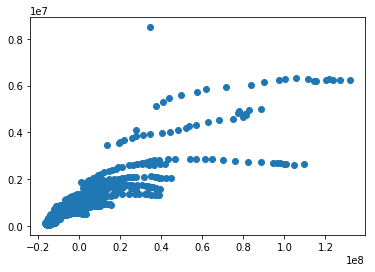

In [13]:
plt.figure()
plt.scatter(feature_New, df.enroll)


# KMeans

In [14]:
kmeans = KMeans(n_clusters=10, n_init=20)

In [16]:
y_pred = kmeans.fit_predict(np.c_[feature_New, df.enroll])

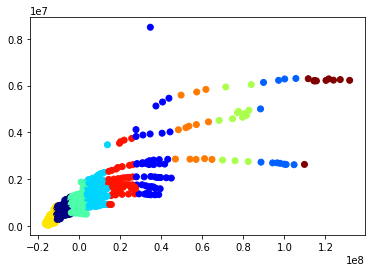

In [17]:
plt.figure()
plt.scatter(feature_New, df.enroll, c = y_pred, cmap = 'jet')